## Predicting House Sale Price
----------------------------------------------------------------

The purpose of this exercise is to practice house price prediction using the sklearn package with the linear regression and Kfold functions. <br>  The linear regression model will be calculated several times by adding or removing features. Kfold cross validation will then be used to check the efficiency of the models. For each k we calculate the square root of the mean of the squared deviation of the test set predictions. The bigger the RMSE, the worse our model is because the distance implies that the predicted values are far from reality. 

The Dataset used shows different houses, their characteristics and their sales information. The Houses are located in Ames in Iowa (USA). <br>
[Data Description](https://s3.amazonaws.com/dq-content/307/data_description.txt)

In [1]:
import numpy as np ; import pandas as pd ; import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error ; from sklearn import linear_model
from sklearn.model_selection import KFold , train_test_split

pd.options.mode.chained_assignment = None

### 1. Introduction

In [2]:
df = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
df.head(5)
#print(df.dtypes)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
# I just wanted to have a complete list of the original features
cols = df.columns.tolist()
print(cols)

['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck 

### Instructions
- Create a function named select_features() that, for now, just returns the Gr Liv Area and SalePrice columns from the train data frame.
- Create a function named train_and_test() that, for now:
    - Split the dataframe into train and test sets
    - Select only the numerical columns
    - Trains a model using all numerical columns except the SalePrice column (the target column) from the data frame returned from select_features()
- Tests the model on the test set and returns the RMSE value.

In [4]:
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    x = df.loc[:, df.columns != 'SalePrice'] ; y = df['SalePrice']
    # Split into train and test   
    x_train, x_test,y_train , y_test = train_test_split(x, y, test_size = 0.3, shuffle=True, random_state=1)
    
    numeric_train = x_train.select_dtypes(include=np.number)
    numeric_test = x_test.select_dtypes(include=np.number)
    
    lr = linear_model.LinearRegression()
    lr.fit(x_train, y_train)
    predictions = lr.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [5]:
filtered_df = select_features(df)
rmse = train_and_test(filtered_df)
print(rmse)

52981.515283372035


### 2. Feature Engineering

In the previous step we haven't checked whether the dataframe contain NaN values. We're now going to check and in case there is any NaN values we are going to only keep the column with less or equal 5% missing values. 

In [6]:
print(f"As the beginning there were {df.isnull().sum().sum()} null values")
df = df.loc[:, df.isnull().mean() <= .05]
print(f"Now there are {df.isnull().sum().sum()} null values")
df

As the beginning there were 13997 null values
Now there are 461 null values


,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


For all numeric columns, we change the NaN values into the most common value (ie the mode) of the column.

In [7]:
numeric = df.select_dtypes(include=np.number).columns.tolist()
for column in numeric:
    df.loc[:,column] = df.loc[:,column].fillna(df[column].mode()[0])

#just have a small bollean to check if we have any NaN in numeric cols
# (df[numeric].isnull().sum() != 0).sum() 
df

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


We have several non-numeric columns, if there is any NaN values in this columns it can cause an issue, therefore we need to drop them.  

In [8]:
non_numeric = df.select_dtypes(exclude=np.number).columns.tolist()

#use this to compute the sum of nulls in this column and drop with any nulls
#print((df[non_numeric].isnull().sum() != 0).sum() )

df.dropna(axis = 1, inplace = True)

df

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


We have two columns Yr since build and Yr since remod that are date columns (year only). The actual date values cannot help the model as it can be difficult to read. I therefore want to create new columns that will compute the length of time between the building time and the selling time, and the remodel time and the selling time.

In [9]:
df['Yr since build'] = df['Yr Sold'] - df['Year Built']
df['Yr since remod'] = df['Yr Sold'] - df['Year Remod/Add']
# Some rows have strangely negative values, these will cause problems later so I remove the rows
df = df.loc[(df['Yr since remod'] >= 0) & (df['Yr since build'] >= 0 ), :]

#Now that we have the lenght time for the houses we don't need to had the columns with dates
df = df.drop(['Year Built', 'Year Remod/Add'], axis=1)

df

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Yr since build,Yr since remod
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,5,2010,WD,Normal,215000,50,50
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,...,120,0,0,6,2010,WD,Normal,105000,49,49
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,12500,6,2010,WD,Normal,172000,52,52
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,4,2010,WD,Normal,244000,42,42
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,3,2010,WD,Normal,189900,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,3,2006,WD,Normal,142500,22,22
2926,2927,923276100,20,RL,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,6,2006,WD,Normal,131000,23,23
2927,2928,923400125,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,700,7,2006,WD,Normal,132000,14,14
2928,2929,924100070,20,RL,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,4,2006,WD,Normal,170000,32,31


We see that some year since build and year since remodel is the same because if there is no remodel then we take the year of build.

From the data we see that we have variables about the sale conditions and event, these variables can create bias in our model therefore I decided to remove the following columns from the model:
- Mo Sold : Month Sold
- Yr Sold : Year Sold
- Sale Type 
- Sale Condition

We are also going to remove two additional colums from the model because their only purpose is to identify the houses, they have no direct impact on selling prices. Those columns are :
- Order 
- PID : Parcel identification number

In [10]:
bad_features = ['Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'Order', 'PID']
df = df.drop(bad_features, axis=1)
df.head()


,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Yr since build,Yr since remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,212,34,0,0,0,0,0,189900,13,12


### 3. Feature Selection

I'm making an assumption here that the most interesting numeric values for the model are the one strongly correlated with the predicted value sale price. I'm therefore going to plot a heatmap here of the correlation matrix.

Text(0.5, 1.0, 'Features Correlating with Sales Price')

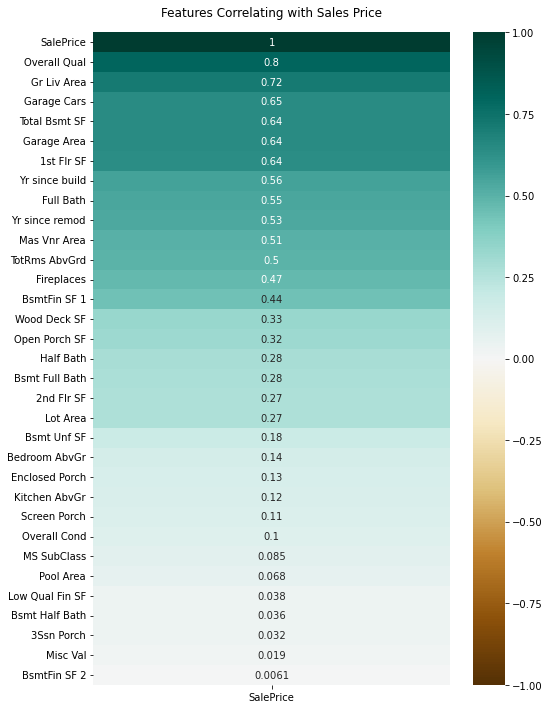

In [11]:
numeric = df.select_dtypes(include=np.number).copy()
corr_saleprice = numeric.corr()[['SalePrice']].abs()

plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(corr_saleprice.sort_values(by='SalePrice', ascending=False), 
vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', pad=16)

We can observe that some variables are more correlated with Sale Price than others, it means that when Sale Price increases these variables increase too. I want to run the model on the values with high correlation, I arbitrarily choose 0.4 as a threshold for choosing such values. 

In [12]:
alpha = 0.4
df.drop(corr_saleprice.index[corr_saleprice[corr_saleprice<alpha].any(axis=1)].tolist(), 
axis = 1, inplace = True)
df

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,Yr since build,Yr since remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,7,Typ,2,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,5,Typ,0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Gd,6,Typ,0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,Ex,8,Typ,2,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,6,Typ,1,2.0,482.0,Y,189900,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,...,TA,6,Typ,0,2.0,588.0,Y,142500,22,22
2926,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,TA,5,Typ,0,2.0,484.0,Y,131000,23,23
2927,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,6,Typ,0,0.0,0.0,Y,132000,14,14
2928,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,...,TA,6,Typ,1,2.0,418.0,Y,170000,32,31


Now I have to take care of the non-numerical values. First we are going to only keep columns that have less than 10 unique values. We do so because when we are going to create dummy variables we are going to have one column per dummy variable an we don't want the dataframe to be too big. 

In [13]:
# Select non_numerical columns
categorical_columns = df.select_dtypes(exclude=np.number).copy()
#Count the number of unique values
n_categories = categorical_columns.nunique()

# I will apply the get_dummies function for these columns so I need to keep columns with only a small
# number of dummies
df.drop(n_categories[n_categories>10].index.tolist(), axis = 1, inplace = True)

#change the datatype of the selected non_numerical columns (from object to category)
df[df.select_dtypes(include = object).columns] = df.select_dtypes(include = object).apply(lambda x: x.astype('category'))

#Create dummies and remove the original columns
dummies = pd.get_dummies(df, df.select_dtypes(include = 'category').columns.tolist())
df = pd.concat([df, dummies], axis=1).drop(df.select_dtypes(include = 'category').columns.tolist(),axis=1)

#I noticed that I have some duplicated columns in my dataframe I'm just going to remove them here 
df = df.loc[:,~df.columns.duplicated()]

df.head()

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,...,0,0,0,0,0,0,1,0,1,0
1,5,0.0,468.0,882.0,896,896,1,5,0,1.0,...,0,0,0,0,0,0,1,0,0,1
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,...,0,0,0,0,0,0,1,0,0,1
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,...,0,0,0,0,0,0,1,0,0,1
4,5,0.0,791.0,928.0,928,1629,2,6,1,2.0,...,0,0,0,0,0,0,1,0,0,1


### 4. Train And Test

Finnally we are going to run the model for all the final features selected.

In [14]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=np.number)
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()

    x = df.loc[:, df.columns != 'SalePrice'] ; y = df['SalePrice']
    # Split into train and test   
    x_train, x_test,y_train , y_test = train_test_split(x, y, test_size = 0.3, shuffle=True, random_state=1)
    
    if k == 0:

        lr.fit(x_train, y_train)
        predictions = lr.predict(x_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        
        lr.fit(x_train, y_train)
        predictions = lr.predict(x_test)

        mse_one = mean_squared_error(y_test, predictions)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(x_test, y_test)
        predictions_two = lr.predict(x_train)        
       
        mse_two = mean_squared_error(y_train, predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])

        rmse_values = [rmse_one, rmse_two]
        return rmse_values, avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        
        avg_rmse = np.mean(rmse_values)
        return rmse_values, avg_rmse


I want to see how the different RMSE varies with the Kfold value, I'm therefore looping through a range of k values.

In [15]:
rmse = list()
for i in range(0,8):
    if i == 0:
        print(f'For k = {i}, the RMSE values for each k until k are {train_and_test(df, k=i)} ')
        rmse.append(train_and_test(df, k=i))
    else:
        rmse_values, avg_rmse= train_and_test(df, k=i)
        #print(f'For k = {i}, the RMSE values for each k until k are {train_and_test(df, k=i)[0]} ')
        print(f'For k = {i}, the average RMSE value is {train_and_test(df, k=i)[1]}')
        rmse.append(train_and_test(df, k=i)[1])

For k = 0, the RMSE values for each k until k are 35040.380926467056 
For k = 1, the average RMSE value is 31611.51451169565
For k = 2, the average RMSE value is 29377.47997771252
For k = 3, the average RMSE value is 29678.139125576705
For k = 4, the average RMSE value is 29166.046306100277
For k = 5, the average RMSE value is 28939.05546937101
For k = 6, the average RMSE value is 29013.18621228781
For k = 7, the average RMSE value is 28742.868395268513


In [16]:
print(f"The minimum RMSE is {min(rmse)} for k = {rmse.index(min(rmse))}")

The minimum RMSE is 28514.156330476282 for k = 7
